In [1]:
import pandas as pd
import os, sys
import numpy as np
import csv
from tqdm import tnrange
import matplotlib.pyplot as plt
sys.path.append('utilities/')


In [2]:
npz_dir='/home/mabon/Pico_Clean/Pico_Scope_Data_Clean/datasets/fpga/FPGA_PicoScope/npz/'
npz_files=[f for f in os.listdir(npz_dir) if f.endswith('.npz')]
npz_files.sort()
npz_files

['FPGA_10k_1.npz',
 'FPGA_10k_2.npz',
 'FPGA_10k_3.npz',
 'FPGA_2k_10.npz',
 'FPGA_2k_11.npz',
 'FPGA_2k_12.npz',
 'FPGA_2k_13.npz',
 'FPGA_2k_4.npz',
 'FPGA_2k_5.npz',
 'FPGA_2k_6.npz',
 'FPGA_2k_7.npz',
 'FPGA_2k_8.npz',
 'FPGA_2k_9.npz']

In [3]:
# Set the directory where the subfolder with the files is located
dir_path = '/home/mabon/Pico_Clean/Pico_Scope_Data_Clean/datasets/fpga/FPGA_PicoScope/csv/'
csv_files=[f for f in os.listdir(dir_path) if f.endswith('.csv')]
csv_files.sort()
csv_files

['20230317-0001_00001.csv',
 '20230317-0001_00002.csv',
 '20230317-0001_00003.csv',
 '20230317-0001_00004.csv',
 '20230317-0001_00005.csv',
 '20230317-0001_00006.csv',
 '20230317-0001_00007.csv',
 '20230317-0001_00008.csv',
 '20230317-0001_00009.csv',
 '20230317-0001_00010.csv',
 '20230317-0001_00011.csv',
 '20230317-0001_00012.csv',
 '20230317-0001_00013.csv',
 '20230317-0001_00014.csv',
 '20230317-0001_00015.csv',
 '20230317-0001_00016.csv',
 '20230317-0001_00017.csv',
 '20230317-0001_00018.csv',
 '20230317-0001_00019.csv',
 '20230317-0001_00020.csv',
 '20230317-0001_00021.csv',
 '20230317-0001_00022.csv',
 '20230317-0001_00023.csv',
 '20230317-0001_00024.csv',
 '20230317-0001_00025.csv',
 '20230317-0001_00026.csv',
 '20230317-0001_00027.csv',
 '20230317-0001_00028.csv',
 '20230317-0001_00029.csv',
 '20230317-0001_00030.csv',
 '20230317-0001_00031.csv',
 '20230317-0001_00032.csv',
 '20230317-0001_00033.csv',
 '20230317-0001_00034.csv',
 '20230317-0001_00035.csv',
 '20230317-0001_0003

In [19]:
# Initialize an empty list to store the data
Trace = []
Trace2 = []

# Loop over CSV files from 10000 to 0 with a progress bar
for i in tnrange(50000, desc='Processing CSV files'):
    # Get the file name
    filename = csv_files[i]
    
    # Initialize an empty list to store the data
    A = []
    
    # Check if the file ends with '.csv'
    if filename.endswith(".csv"):
        
        # Read the CSV file into a data frame and clean it
        data_frame = pd.read_csv(dir_path+filename)
        data_frame = data_frame.reset_index(drop=True)
        data_frame = data_frame.drop(index=[0,1]).reset_index(drop=True)

        # Extract the 'Channel A' and 'Channel B' columns and append them to the list 'A'
        A.append(list(map(float, data_frame['Channel A'].values)))
        A.append([float(val)if val!='-∞'and val!='∞' else 0 if val=='∞' else float('-inf') for val in (data_frame['Channel B'].values)])
        
        # Delete the data frame to save memory
        del data_frame
        
        # Find the index where the value in 'Channel A' is greater than 2
        for j in range(len(np.array(A)[1])):
            if (A[0][j]>2):
                break
        
        # Append a slice of 'Channel B' data to 'Trace'
        Trace.append(A[1])
        Trace2.append(A[0])
#         FOR STM32 AT 500 MS
#         Trace.append(A[1][j+21000:j+36000])        
        # Delete the list 'A' to save memory
        del A

# Convert the list 'Trace' to a numpy array and divide it by 100
Trace = np.array(Trace) / 100


/home/mabon/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


Processing CSV files:   0%|          | 0/50000 [00:00<?, ?it/s]

KeyboardInterrupt: 

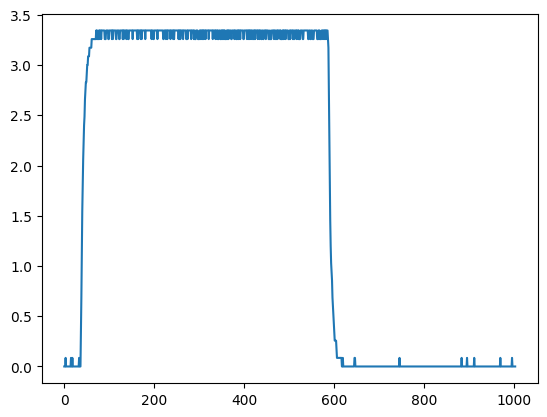

In [15]:
plt.plot(Trace2[10])

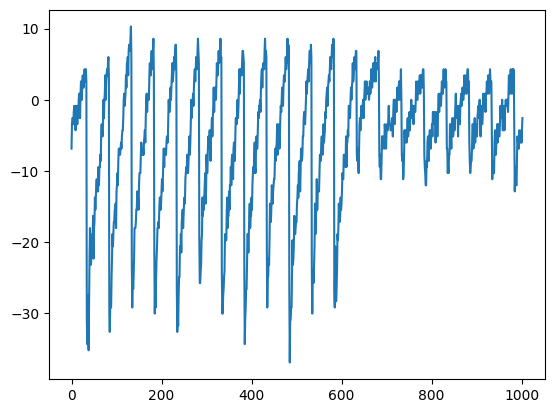

In [20]:
plt.plot(Trace[10])

In [ ]:
np.array(Trace).shape

In [ ]:
txt=[]
for i in tnrange(5, desc='Processing CSV files'):
    whole_pack = np.load(npz_dir+npz_files[i])
    textin_array, key=whole_pack['plain_text'], whole_pack['key']
    for j in range (np.array(textin_array).shape[0]):
        txt.append(textin_array[j])
        

In [ ]:
np.array(txt).shape

In [ ]:
outfile='temp_merge'
np.savez(outfile, power_trace=Trace, plain_text=txt,key=key)

Disclamer

This code was developed by Mabon Ninan

UCDasec

Suprivision of Dr. Boyang Wang

For Research USE ONLY
